In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits import mplot3d
from sklearn.manifold import TSNE
import os

In [3]:
#Importing data
os.chdir("C:/Users/tony/Desktop/Machine Learning")
file = pd.read_csv("jewelry_customers.csv")


In [4]:
#Quick EDA for outliers/NAs
file.describe()
file.isna().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

In [5]:
#Feature scaling using standardization
standard_data = StandardScaler().fit_transform(file)
standard_data = pd.DataFrame(standard_data, columns = file.columns)

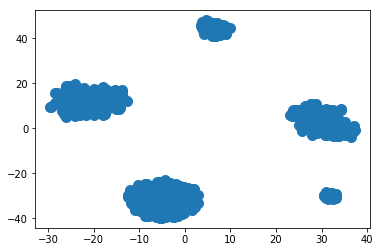

In [6]:
#Reduce dimension with PCA for 2D Visualization
X = TSNE(n_components= 2, random_state= 30, perplexity = 25).fit_transform(standard_data)
plt.scatter(X[:, 0], X[:, 1], s = 100)

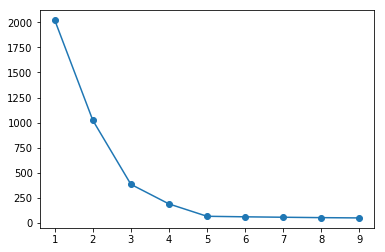

In [7]:
#KMeans with elbow to find optimal n_cluster
elbow = []
k_elbow = list(range(1, 10))

for i in k_elbow:
    km = KMeans(i, random_state= 30)
    km.fit(standard_data)
    elbow.append(km.inertia_)
    
#Elbow Plot, optimal n_cluster = 3
plt.plot(k_elbow, elbow, '-o')

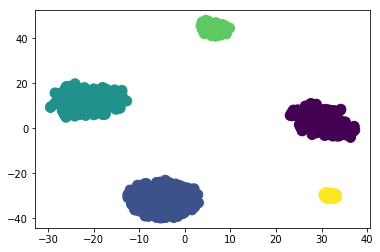

In [8]:
#Prediction
km_elbow = KMeans(n_clusters= 5, random_state= 30)
km_elbow_prediction = km_elbow.fit_predict(standard_data)

plt.scatter(X[:,0], X[:,1], c = km_elbow_prediction, s = 100)

In [9]:
km_prediction = pd.DataFrame(km_elbow_prediction)
final = pd.concat([file, km_prediction], ignore_index = False, sort = False, axis = 1)

In [10]:
final.to_csv("jewel_prediction.csv")